In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [128]:
df=pd.read_csv("E:/cruise_ship_datasets/output_deaths.csv",encoding='latin-1')

In [129]:
df.head()

,date_published,death_type,deceased_name,deceased_age,deceased_gender,is_passenger,is_crew,ship_cruise_line,ship_name,ship_callsign
0,29-10-2000,overboard,Manuelita Mandy Dejos Pierce,39.0,female,True,False,Royal Caribbean International,Enchantment Of The Seas,C6FZ7
1,18-08-2000,suicide,Paula Ann Gunderson,45.0,female,True,False,Carnival Cruise Line,Carnival Holiday,NaN
2,06-06-2000,norovirus,Edith Horn,78.0,female,True,False,NaN,MV Van Gogh,NaN
3,13-05-2000,natural,Barbara Clifton,NaN,female,True,False,Carnival Cruise Line,Carnival Spirit,9HA3097
4,24-04-2000,natural,George Paoa,65.0,male,True,False,NaN,NaN,NaN


#### data cleaning

In [130]:
df['deceased_age'].fillna(55,inplace=True)

In [131]:
df.dtypes

date_published       object
death_type           object
deceased_name        object
deceased_age        float64
deceased_gender      object
is_passenger           bool
is_crew                bool
ship_cruise_line     object
ship_name            object
ship_callsign        object
dtype: object

In [132]:
df['age']=df['deceased_age'].astype(int)

In [133]:
df.dtypes

date_published       object
death_type           object
deceased_name        object
deceased_age        float64
deceased_gender      object
is_passenger           bool
is_crew                bool
ship_cruise_line     object
ship_name            object
ship_callsign        object
age                   int32
dtype: object

In [134]:
df.drop(df.loc[:,['deceased_age']],axis=1,inplace=True)

In [135]:
df.head()

,date_published,death_type,deceased_name,deceased_gender,is_passenger,is_crew,ship_cruise_line,ship_name,ship_callsign,age
0,29-10-2000,overboard,Manuelita Mandy Dejos Pierce,female,True,False,Royal Caribbean International,Enchantment Of The Seas,C6FZ7,39
1,18-08-2000,suicide,Paula Ann Gunderson,female,True,False,Carnival Cruise Line,Carnival Holiday,NaN,45
2,06-06-2000,norovirus,Edith Horn,female,True,False,NaN,MV Van Gogh,NaN,78
3,13-05-2000,natural,Barbara Clifton,female,True,False,Carnival Cruise Line,Carnival Spirit,9HA3097,55
4,24-04-2000,natural,George Paoa,male,True,False,NaN,NaN,NaN,65


In [136]:
df.isnull().sum()

date_published        0
death_type           17
deceased_name         1
deceased_gender      46
is_passenger          0
is_crew               0
ship_cruise_line    151
ship_name           186
ship_callsign       228
age                   0
dtype: int64

In [137]:
df.dropna(subset=['death_type'],inplace=True)

In [138]:
df['deceased_name'].fillna('John Doe',inplace=True)

In [139]:
df.drop(df.loc[:,['ship_callsign']],axis=1,inplace=True)

In [140]:
df.dropna(subset=['ship_cruise_line'],inplace=True)

In [141]:
df.isnull().sum()

date_published       0
death_type           0
deceased_name        0
deceased_gender     24
is_passenger         0
is_crew              0
ship_cruise_line     0
ship_name           48
age                  0
dtype: int64

In [124]:
df.shape

(399, 9)

In [142]:
df.replace(to_replace='Norwegian Cruise Line',value='Norwegian Cruise Lines',inplace=True)

#### **data cleaning ends here

### The following info tells about the number of deaths on each ship whose names are known.

In [194]:
pd.set_option('display.max_rows', 500)
df.groupby('ship_cruise_line')['ship_name'].value_counts()

ship_cruise_line               ship_name                      
Carnival Cruise Line           Carnival Liberty                   12
                               Carnival Miracle                   11
                               Carnival Fantasy                   10
                               Carnival Ecstasy                    8
                               Carnival Triumph                    8
                               Carnival Destiny                    7
                               Carnival Elation                    7
                               Carnival Fascination                7
                               Carnival Inspiration                7
                               Carnival Conquest                   6
                               Carnival Glory                      6
                               Carnival Victory                    6
                               Carnival Freedom                    5
                               Carnival 

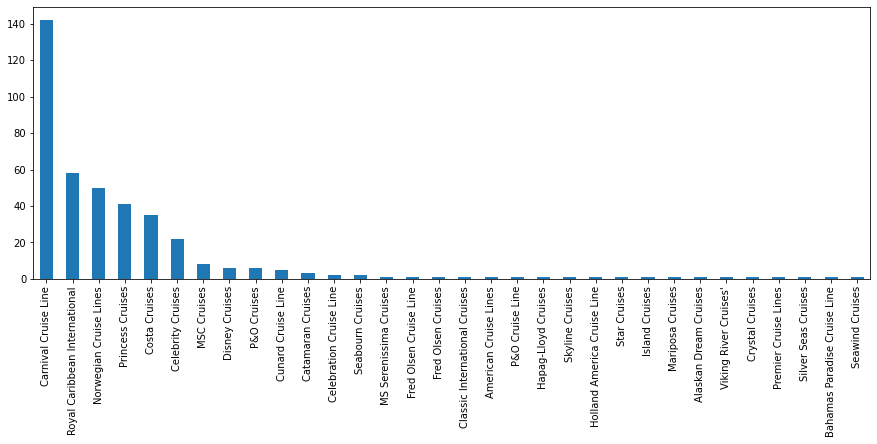

In [181]:
df['ship_cruise_line'].value_counts().plot(kind='bar',figsize=(15,5))
plt.show()

### **The plot above shows that 'Carnival Cruise Line' has the most no. of deaths onboard.

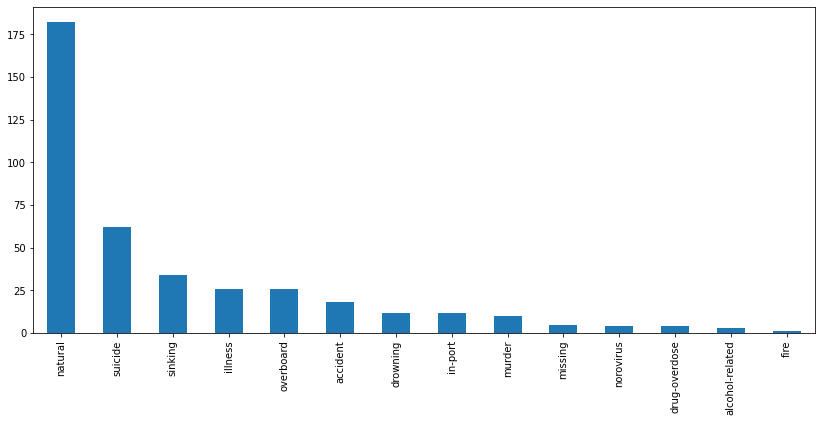

In [175]:
df['death_type'].value_counts().plot(kind='bar',figsize=(14,6))
plt.show()

### **The plot above shows that the cause of most no. of deaths was 'Natural'.

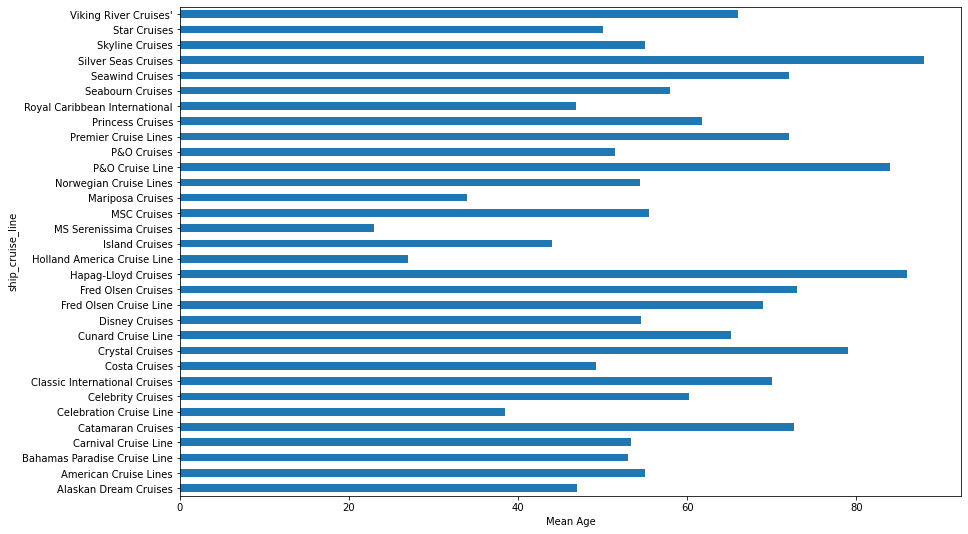

In [145]:
df.groupby('ship_cruise_line')['age'].mean().plot(kind='barh',figsize=(14,9))
plt.xlabel('Mean Age')
plt.show()

### **The plot above illustrates the mean age of all the deceased people onboard.'Silver Seas Cruises' have the highest mean of all the ages

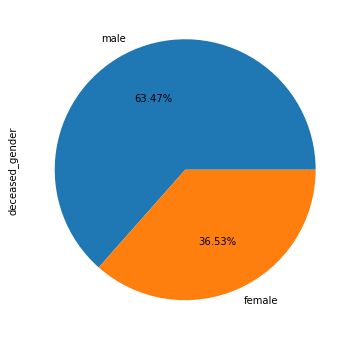

In [196]:
df['deceased_gender'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(15,6))
plt.show()

#### **The above plot shows the percentage of gender that died.

### The no. of people who died onboard and were passengers are presented as follows

In [120]:
df.groupby('ship_cruise_line')['is_passenger'].sum().sort_values(ascending=False)

ship_cruise_line
Carnival Cruise Line             131.0
Royal Caribbean International     44.0
Princess Cruises                  38.0
Norwegian Cruise Lines            34.0
Celebrity Cruises                 20.0
Disney Cruises                     5.0
P&O Cruises                        5.0
MSC Cruises                        5.0
Cunard Cruise Line                 4.0
Catamaran Cruises                  3.0
Celebration Cruise Line            2.0
Costa Cruises                      2.0
Viking River Cruises'              1.0
Crystal Cruises                    1.0
Fred Olsen Cruise Line             1.0
Fred Olsen Cruises                 1.0
Mariposa Cruises                   1.0
Star Cruises                       1.0
P&O Cruise Line                    1.0
Seabourn Cruises                   1.0
Silver Seas Cruises                1.0
Skyline Cruises                    1.0
Classic International Cruises      1.0
Bahamas Paradise Cruise Line       0.0
American Cruise Lines              0.0
Holland 

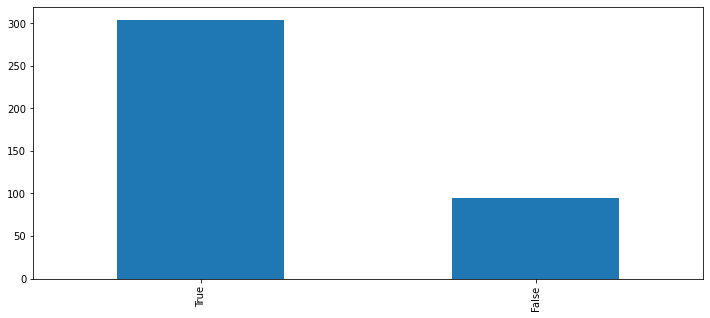

In [178]:
df['is_passenger'].value_counts().plot(kind='bar',figsize=(12,5))
plt.show()

#### **Here 'True' represents 'passengers' and false represents 'crew members'

### The no. of people who died onboard and were crew members are presented as follows

In [121]:
df.groupby('ship_cruise_line')['is_crew'].sum().sort_values(ascending=False)

ship_cruise_line
Norwegian Cruise Lines           6.0
Royal Caribbean International    6.0
Carnival Cruise Line             4.0
Celebrity Cruises                2.0
Princess Cruises                 2.0
Costa Cruises                    2.0
Hapag-Lloyd Cruises              1.0
Island Cruises                   1.0
MS Serenissima Cruises           1.0
MSC Cruises                      1.0
Holland America Cruise Line      1.0
Disney Cruises                   1.0
Classic International Cruises    0.0
Celebration Cruise Line          0.0
Catamaran Cruises                0.0
Bahamas Paradise Cruise Line     0.0
Crystal Cruises                  0.0
American Cruise Lines            0.0
Cunard Cruise Line               0.0
Viking River Cruises'            0.0
Fred Olsen Cruise Line           0.0
Fred Olsen Cruises               0.0
Star Cruises                     0.0
Mariposa Cruises                 0.0
P&O Cruise Line                  0.0
P&O Cruises                      0.0
Premier Cruise Lines 

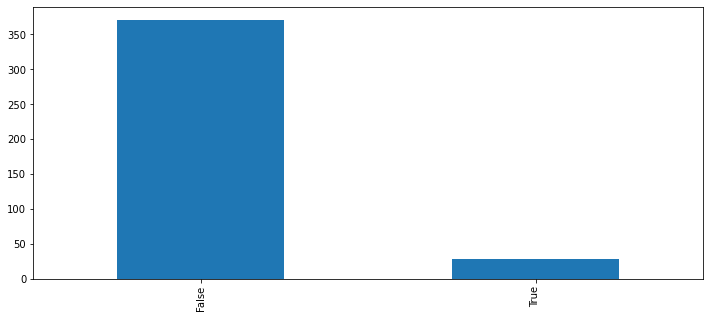

In [179]:
df['is_crew'].value_counts().plot(kind='bar',figsize=(12,5))
plt.show()

##### **Here 'True' represents 'crew members' and false represents 'passengers'.Also, from the above info and plots we can conclude that the people who died onboard were mostly passengers

#### 